In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from os import listdir
%matplotlib inline
from functools import reduce

In [2]:
output_class = "Results"
base_path = "C:/Users/sarah/Desktop/SpotAssayQuant/Examples/Grayscale/" + output_class + "/"

object_file = base_path + "Spreadsheets/SpotAsssayQuant_EditedObjects.csv"
image_file = base_path + "Spreadsheets/SpotAsssayQuant_Image.csv"


df = pd.read_csv(object_file)
df = df[["ImageNumber","ObjectNumber","AreaShape_Area", "Classify_Row1", "Classify_Row2", "Classify_Row3", "Classify_Row4", "Classify_Row5", "Classify_Row6", "Classify_Row7"]]
df = df.rename(columns = {'AreaShape_Area': 'Area','Classify_Row1':'Row1','Classify_Row2':'Row2','Classify_Row3':'Row3','Classify_Row4':'Row4','Classify_Row5':'Row5','Classify_Row6':'Row6', 'Classify_Row7':'Row7'})

image_names = pd.read_csv(image_file)
image_df = image_names[["FileName_original", "ImageNumber"]] #include other stuff later
df = df.merge(image_df, on = "ImageNumber")



In [4]:
row_names = df.filter(regex="Row.*").columns.values
dfs = []
for r in row_names:
    dfs.append(df.loc[df[r]==1].groupby("FileName_original")["Area"].sum().rename(r).reset_index())

In [5]:
rowareas = reduce(lambda left,right: pd.merge(left,right,on='FileName_original', how = "outer"), dfs)
rowareas= rowareas.fillna(0)
rowareas = rowareas.set_index("FileName_original")


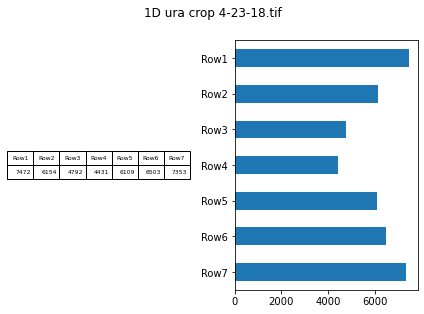

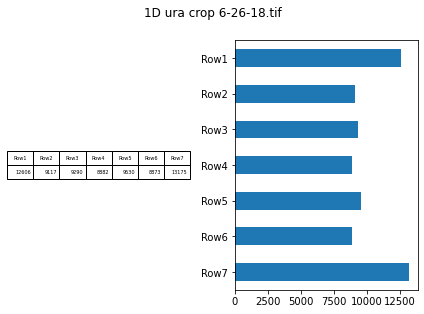

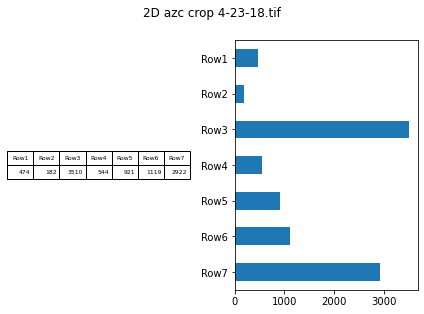

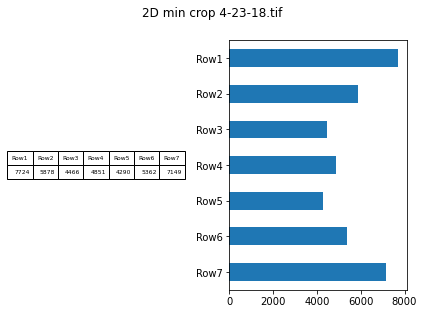

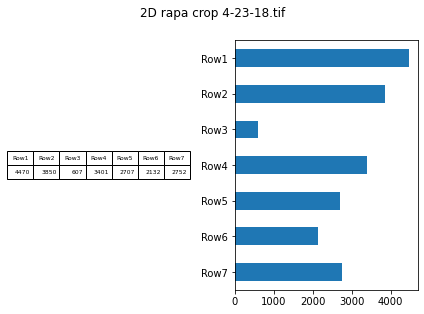

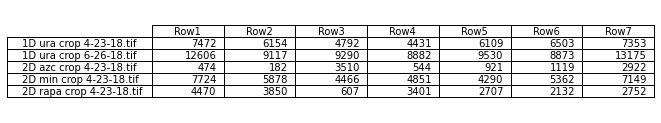

In [6]:
with PdfPages(base_path + "Graphs/Result_graphs.pdf") as pdf:
    for index, row in rowareas.iterrows():
        fig, ax = plt.subplots(1,2)
        fig.suptitle(row.name, y = 1.08)
        fig.patch.set_visible(False)

        ax[0].axis('off')
        ax[0].axis('tight')
        ax[0].table(cellText=[row.values], colLabels=row.index, loc='center')

        plot = row.plot(ax = ax[1], kind='barh')
        plt.gca().invert_yaxis() 
       # ax[1].get_legend().remove()

        fig.tight_layout()
        plt.show()
        pdf.savefig(fig,bbox_inches='tight')
        
with PdfPages(base_path + "Graphs/Result_table.pdf") as pdf:
    fig = plt.figure(figsize=(9,2))
    ax = plt.subplot(111)
    ax.axis('off')
    ax.axis('tight')
    #fig.suptitle(output_class + ' Areas', y = 1.08)
    ax.table(cellText=rowareas.values, colLabels=rowareas.columns,  rowLabels=rowareas.index,  loc='center')
    #fig.tight_layout()

    pdf.savefig(fig,bbox_inches='tight')
        
        


In [7]:
rowareas.to_csv(base_path + "/Graphs/"+output_class+" Results.csv")
